1. Importing liberaries, dataset, and applying train test split with test size 0.25

In [68]:
# Import packages
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Importing data
metro = pd.read_csv('Frogs_MFCCs.csv')


# Test and train 75% and 25% split 
X_train, X_test, y_train, y_test = train_test_split( metro.drop('Family', axis=1), metro.loc[:, 'Family'], test_size=0.25, random_state=0)

2. Performed logistic regression and generated confusion matrix from it

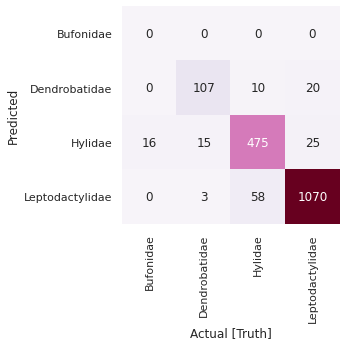

In [69]:
classifier = OneVsRestClassifier(LogisticRegression())
classifier.fit(X_train, y_train)
pred_one= classifier.predict(X_test)
pred_prob_one= classifier.predict_proba(X_test)

# Generating Confusion Matrix
one_metro = confusion_matrix(pred_one, y_test)
one_names_metro = np.unique(y_test)
sns.heatmap(one_metro, square=True, annot=True, fmt='d', cbar=False,cmap='PuRd',xticklabels=one_names_metro, yticklabels=one_names_metro)
plt.xlabel('Actual [Truth]')
plt.ylabel('Predicted')
plt.show()

3. Performed GaussianNB and generated confusion matrix from it

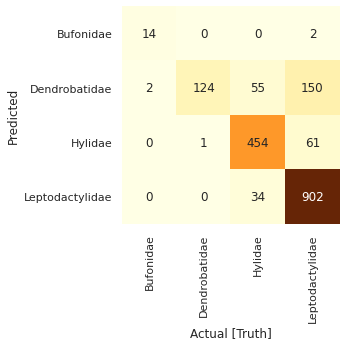

In [70]:
model= OneVsRestClassifier(GaussianNB())

# Train the model 
model.fit(X_train, y_train)

# Predicting
pred_metro = model.predict(X_test)
pred_prob_nb = model.predict_proba(X_test)

# Generating Confusion Matrix
mat_metro = confusion_matrix(pred_metro, y_test)
names_metro = np.unique(pred_metro)
sns.heatmap(mat_metro, square=True, annot=True, fmt='d', cbar=False,cmap='YlOrBr',
            xticklabels=names_metro, yticklabels=names_metro)
plt.xlabel('Actual [Truth]')
plt.ylabel('Predicted')
plt.show()

4. Performed KNN and generated confusion matrix from it

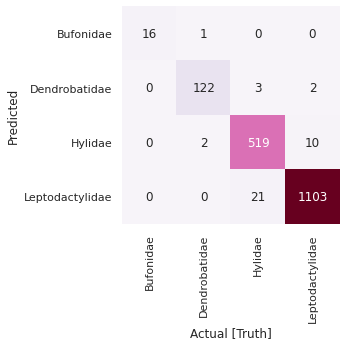

In [71]:
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=20))
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
pred_prob_knn = knn.predict_proba(X_test)

# Generating Confusion Matrix
knn_metro = confusion_matrix(knn_pred, y_test)
knn_names_metro = np.unique(knn_pred)
sns.heatmap(knn_metro, square=True, annot=True, fmt='d', cbar=False,cmap='PuRd',
            xticklabels=knn_names_metro, yticklabels=knn_names_metro)
plt.xlabel('Actual [Truth]')
plt.ylabel('Predicted')
plt.show()


5. Performed Multi Layer Classifier and generated confusion matrix from it

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


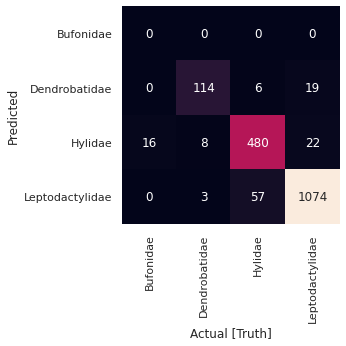

In [72]:
metro_clf = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(19),activation="logistic",random_state=1))
metro_clf.fit(X_train, y_train)
metro_y_pred=metro_clf.predict(X_test)
pred_prob_nn = metro_clf.predict_proba(X_test)
#print(confusion_matrix(metro_y_pred, y_test))

# Generating Confusion Matrix
nn_metro = confusion_matrix(metro_y_pred, y_test)
nn_names_metro = np.unique(y_test)
sns.heatmap(nn_metro, square=True, annot=True, fmt='d', cbar=False, xticklabels= nn_names_metro, yticklabels=nn_names_metro)
plt.xlabel('Actual [Truth]')
plt.ylabel('Predicted')
plt.show()

6. Performed Random Forest Classifier and generated confusion matrix from it

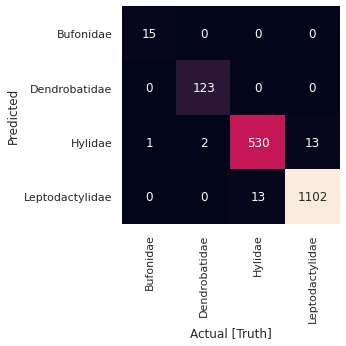

In [73]:
from sklearn.ensemble import RandomForestClassifier

clf = OneVsRestClassifier(RandomForestClassifier(random_state=42))
clf.fit(X_train, y_train)
rf_y_pred=clf.predict(X_test)
pred_prob_rf = clf.predict_proba(X_test)

rf_metro = confusion_matrix(rf_y_pred, y_test)
rf_names_metro = np.unique(y_test)
sns.heatmap(rf_metro, square=True, annot=True, fmt='d', cbar=False, xticklabels= rf_names_metro, yticklabels=rf_names_metro)
plt.xlabel('Actual [Truth]')
plt.ylabel('Predicted')
plt.show()

7. AUC ROC curved

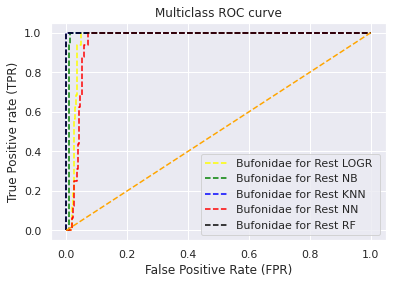

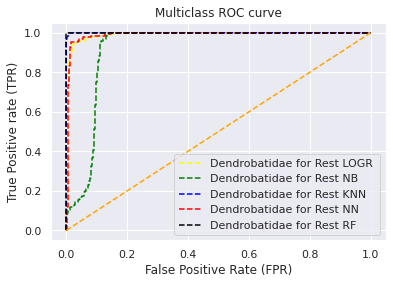

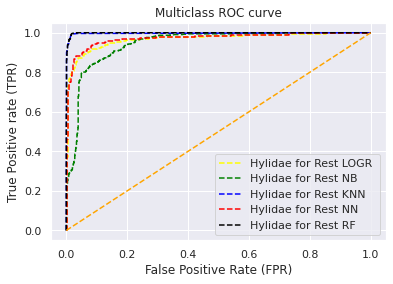

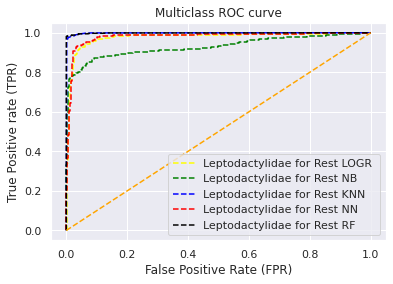

In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

FPR = {}
TPR = {}
THRESH ={}

FPRNB = {}
TPRNB = {}
THRESHNB ={}

FPRKNN = {}
TPRKNN = {}
THRESHKNN ={}

FPRNN = {}
TPRNN = {}
THRESHNN ={}

FPRRF = {}
TPRRF = {}
THRESHRF ={}

new_y_test = np.where(np.array(y_test) == 'Bufonidae', 0, np.array(y_test))
new_y_test = np.where(new_y_test == 'Dendrobatidae', 1, new_y_test)
new_y_test = np.where(new_y_test == 'Hylidae', 2, new_y_test)
new_y_test = np.where(new_y_test == 'Leptodactylidae', 3, new_y_test)
new_y_test.reshape(-1,1)

n_class = 4
for i in range(n_class):    
    FPR[i], TPR[i], THRESH[i] = roc_curve(new_y_test.astype(int), pred_prob_one[:,i], pos_label=i)
    FPRNB[i], TPRNB[i], THRESHNB[i] = roc_curve(new_y_test.astype(int), pred_prob_nb[:,i], pos_label=i)
    FPRKNN[i], TPRKNN[i], THRESHKNN[i] = roc_curve(new_y_test.astype(int), pred_prob_knn[:,i], pos_label=i)
    FPRNN[i], TPRNN[i], THRESHNN[i] = roc_curve(new_y_test.astype(int), pred_prob_nn[:,i], pos_label=i)
    FPRRF[i], TPRRF[i], THRESHRF[i] = roc_curve(new_y_test.astype(int), pred_prob_rf[:,i], pos_label=i)


random_probs = [0 for i in range(len(y_test))]
p_FPR, p_TPR, _ = roc_curve(new_y_test.astype(int), random_probs, pos_label=1)

# plotting    
plt.plot(FPR[0], TPR[0], linestyle='--',color='yellow', label='Bufonidae for Rest LOGR ')
plt.plot(FPRNB[0], TPRNB[0], linestyle='--',color='green', label='Bufonidae for Rest NB')
plt.plot(FPRKNN[0], TPRKNN[0], linestyle='--',color='blue', label='Bufonidae for Rest KNN')
plt.plot(FPRNN[0], TPRNN[0], linestyle='--',color='red', label='Bufonidae for Rest NN')
plt.plot(FPRRF[0], TPRRF[0], linestyle='--',color='black', label='Bufonidae for Rest RF')
plt.plot(p_FPR, p_TPR, linestyle='--', color='orange')
plt.legend(loc='best')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive rate (TPR)')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

plt.show()

plt.plot(FPR[1], TPR[1], linestyle='--',color='yellow', label='Dendrobatidae for Rest LOGR ')
plt.plot(FPRNB[1], TPRNB[1], linestyle='--',color='green', label='Dendrobatidae for Rest NB')
plt.plot(FPRKNN[1], TPRKNN[1], linestyle='--',color='blue', label='Dendrobatidae for Rest KNN')
plt.plot(FPRNN[1], TPRNN[1], linestyle='--',color='red', label='Dendrobatidae for Rest NN')
plt.plot(FPRRF[1], TPRRF[1], linestyle='--',color='black', label='Dendrobatidae for Rest RF')
plt.plot(p_FPR, p_TPR, linestyle='--', color='orange')
plt.legend(loc='best')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive rate (TPR)')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

plt.show()

plt.plot(FPR[2], TPR[2], linestyle='--',color='yellow', label='Hylidae for Rest LOGR ')
plt.plot(FPRNB[2], TPRNB[2], linestyle='--',color='green', label='Hylidae for Rest NB')
plt.plot(FPRKNN[2], TPRKNN[2], linestyle='--',color='blue', label='Hylidae for Rest KNN')
plt.plot(FPRNN[2], TPRNN[2], linestyle='--',color='red', label='Hylidae for Rest NN')
plt.plot(FPRRF[2], TPRRF[2], linestyle='--',color='black', label='Hylidae for Rest RF')
plt.plot(p_FPR, p_TPR, linestyle='--', color='orange')
plt.legend(loc='best')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive rate (TPR)')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

plt.show()

plt.plot(FPR[3], TPR[3], linestyle='--',color='yellow', label='Leptodactylidae for Rest LOGR ')
plt.plot(FPRNB[3], TPRNB[3], linestyle='--',color='green', label='Leptodactylidae for Rest NB')
plt.plot(FPRKNN[3], TPRKNN[3], linestyle='--',color='blue', label='Leptodactylidae for Rest KNN')
plt.plot(FPRNN[3], TPRNN[3], linestyle='--',color='red', label='Leptodactylidae for Rest NN')
plt.plot(FPRRF[3], TPRRF[3], linestyle='--',color='black', label='Leptodactylidae for Rest RF')
plt.plot(p_FPR, p_TPR, linestyle='--', color='orange')
plt.legend(loc='best')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive rate (TPR)')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

plt.show()
    

8. Predicting using Random Forest

In [75]:
new_feed = pd.DataFrame(data={"MFCCs_ 1":[1],
                        "MFCCs_ 2":[0.233512195],
                        "MFCCs_ 3":[-0.105585903  ],
                        "MFCCs_ 4":[0.200721915 ],
                        "MFCCs_ 5":[0.317201062 ],
                        "MFCCs_ 6":[0.260763853 ],
                        "MFCCs_ 7":[0.100944641 ],
                        "MFCCs_ 8":[-0.150062605  ],
                        "MFCCs_ 9":[-0.171127632  ],
                        "MFCCs_ 10":[0.124676436  ],
                        "MFCCs_ 11":[0.188654146  ],
                        "MFCCs_ 12":[-0.075621723 ],
                        "MFCCs_ 13":[-0.156435925 ],
                        "MFCCs_ 14":[0.082245115  ],
                        "MFCCs_ 14":[0.135752042  ],
                        "MFCCs_ 15":[-0.024016645 ],
                        "MFCCs_ 16":[-0.108351107 ],
                        "MFCCs_ 17":[-0.077622521 ],
                        "MFCCs_ 18":[-0.009567802 ],
                        "MFCCs_ 19":[0.057683975  ],
                        "MFCCs_ 20":[0.118680135  ],
                        "MFCCs_ 21":[0.014038446  ], 
                        "MFCCs_ 22":[0.100944641  ]
                        }
                  )
rf_y_pred=clf.predict(new_feed)

print(rf_y_pred)

['Dendrobatidae']
